#In this exercise, you'll be working with a dataset on house sales in King County, Washington. 
#You can get more information about this dataset 
#[here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 
#Our first goal is to build a predictive model for the sales price.
#We'll start with a simple model, one which uses just the square footage of living space as our only predictor variable.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
house_sales_df = pd.read_csv("C:/Users/billy/Documents/NSS_projects/ml-exercise-01-BillyBrothers/data/kc_house_data.csv")
house_sales_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Before building the model, start by looking at a scatterplot of price vs. the square footage of living space. What do you find? How strong does the relationship appear to be?

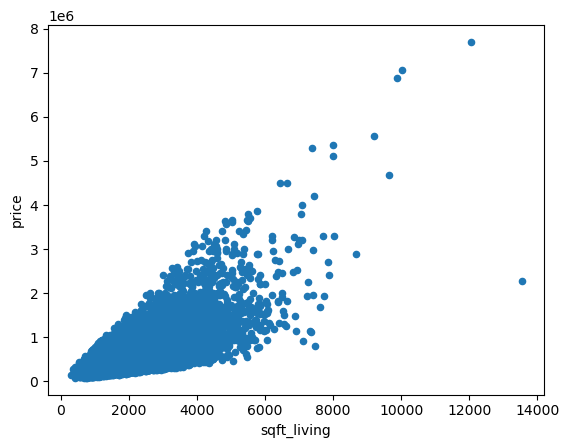

In [5]:
house_sales_df.plot.scatter(x="sqft_living", y="price");

2. Create a DataFrame, X, which contains one column, the sqft_living space and a Series, y, which contains the target variable. 
One of the most important concepts when it comes to machine learning is that the only performance we care about is how well the model predicts on data that it has not seen yet.
One way to accomplish this is through setting aside a portion of the data as a **test set** and to train the model on the remaining portion.

In [7]:
X = house_sales_df[["sqft_living"]]
y = house_sales_df['price'].values

3. Use the [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and a test set from X and y. Name the resulting pieces X_train, X_test, y_train, and y_test. When you do this, use 30% of the data in the test set. Also, use the random_state parameter so that we can compare model performance as we change the way we build our model.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

4. Import the [LinearRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the linear_model module. Then create a linear regression instance and fit it to the training data.

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

5. What is the intercept term, and what is the coefficient for sqft_living? How can you interpret how the model is using sqft_living to make predictions? Hint: You can get these values by looking at the .intercept_ and .coef_ attributes of the fit model.

In [50]:
reg_coef = reg.coef_ 
print("Regression's Coefficient: {}".format(reg_coef))
reg_intercept = reg.intercept_
print("Regression's Intercept : {}".format(reg_intercept))

Regression's Coefficient: [279.51011741]
Regression's Intercept : -41947.45401876245


6. Use the predict method to generate a set of predictions on X_test. Save the results to y_pred. Question: What type of object is y_pred? What is its shape and how does it compare to X_test?

In [15]:
y_pred = reg.predict(X_test)
print("y_pred type: {}".format(type(y_pred)))
print("y_pred shape: {}".format(y_pred.shape))
print("y_test type: {}".format(type(y_test)))
print("y_test shape: {}".format(y_test.shape))

y_pred type: <class 'numpy.ndarray'>
y_pred shape: (6484,)
y_test type: <class 'numpy.ndarray'>
y_test shape: (6484,)


Now, we can evaluate how well the model did. There are a number of different metrics that could be used. Let's look at five of them, mean squared error, root mean squared error, mean absolute error, mean absolute percentage error, and R^2 score. For more information on these metrics, see https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/.

7. Calculate each metric on the test set. For each one, interpret what the number means.

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
MeanSquaredError = mean_squared_error(y_test, y_pred)
RootMeanSquaredError = np.sqrt(MeanSquaredError)
MeanAbsoluteError = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
MeanAbsolutePercentageError = mean_absolute_percentage_error(y_test, y_pred) * 100

In [18]:
print("MeanSquaredError: Using Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage of homes - note: is a squared value. \n".format(MeanSquaredError))
print("RootMeanSquaredError: Using Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage.\n".format(RootMeanSquaredError)) 
print("MeanAbsoluteError: Using Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage.\n".format(MeanAbsoluteError)) 
print("R_squared:Roughly {} of the variance in a house price can be explained by the square footage of the house. One variable accounting for almost half of the variance is price is significant.\n".format(r_squared))
print("MeanAbsolutePercentageError: Using Linear Regression, on average, our predicted home prices are {}% off our actual home prices, based on square footage.\n".format(MeanAbsolutePercentageError))

MeanSquaredError: Using Linear Regression, on average, each predicted home price is off by $74509993356.49603 than the actual home price, based on square footage of homes - note: is a squared value. 

RootMeanSquaredError: Using Linear Regression, on average, each predicted home price is off by $272965.1870779423 than the actual home price, based on square footage.

MeanAbsoluteError: Using Linear Regression, on average, each predicted home price is off by $177803.0458452365 than the actual home price, based on square footage.

R_squared:Roughly 0.48388319278201475 of the variance in a house price can be explained by the square footage of the house. One variable accounting for almost half of the variance is price is significant.

MeanAbsolutePercentageError: Using Linear Regression, on average, our predicted home prices are 36.04093327559772% off our actual home prices, based on square footage.



It's always a good idea to see how well your model performs against a simple baseline. In the case of regression, a very simple model would be one that just predicts the overall average home price on the training data.

8. Create a numpy array that is the same length as y_test which just contains a constant value equal to the mean of the target variable on the training data. Hint: you could use the [full_like function from numpy](https://numpy.org/doc/2.2/reference/generated/numpy.full_like.html) to create this array. Does the model using sqft_living do better than this simple baseline model? 

In [20]:
baseline_prediction = np.full_like(y_test, fill_value = np.mean(y_train))

In [21]:
MeanSquaredError_baseline = mean_squared_error(y_test, baseline_prediction)
RootMeanSquaredError_baseline = np.sqrt(MeanSquaredError)
MeanAbsoluteError_baseline = mean_absolute_error(y_test, baseline_prediction)
r_squared_baseline = r2_score(y_test, baseline_prediction)
MeanAbsolutePercentageError_baseline = mean_absolute_percentage_error(y_test, baseline_prediction) * 100

In [22]:
print("MeanSquaredError: Using Simple Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage of homes - note: is a squared value. \n".format(MeanSquaredError_baseline))
print("RootMeanSquaredError: Using Simple Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage.\n".format(RootMeanSquaredError_baseline)) 
print("MeanAbsoluteError: Using Simple Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage.\n".format(MeanAbsoluteError_baseline)) 
print("R_squared:Roughly {} of the variance in a house price can be explained by the square footage of the house. One variable accounting for almost half of the variance is price is significant.\n".format(r_squared_baseline))
print("MeanAbsolutePercentageError: Using Simple Linear Regression, on average, our predicted home prices are {}% off our actual home prices, based on square footage.\n".format(MeanAbsolutePercentageError_baseline))

MeanSquaredError: Using Simple Linear Regression, on average, each predicted home price is off by $144433113433.55414 than the actual home price, based on square footage of homes - note: is a squared value. 

RootMeanSquaredError: Using Simple Linear Regression, on average, each predicted home price is off by $272965.1870779423 than the actual home price, based on square footage.

MeanAbsoluteError: Using Simple Linear Regression, on average, each predicted home price is off by $237674.864169316 than the actual home price, based on square footage.

R_squared:Roughly -0.0004611999523151944 of the variance in a house price can be explained by the square footage of the house. One variable accounting for almost half of the variance is price is significant.

MeanAbsolutePercentageError: Using Simple Linear Regression, on average, our predicted home prices are 53.117542094915706% off our actual home prices, based on square footage.



While we started with a linear regression model, there are other types of models that we could try out. A k-nearest-neighbors model generates predictions by finding the most similar points in the training data and averaging their target values. It is a non-parametric model and doesn't assume a particular form for the relationship between the features and the target. 

9. Fit a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) to the data using just the square footage of living space and using 5 neighbors. How do the metrics compare to those for the linear regression model? 

In [52]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 5)
KNR.fit(X_train, y_train)
y_nearest_pred = KNR.predict(X_test)

In [54]:
MeanSquaredError_regressor = mean_squared_error(y_test, y_nearest_pred)
RootMeanSquaredError_regressor = np.sqrt(MeanSquaredError)
MeanAbsoluteError_regressor = mean_absolute_error(y_test, y_nearest_pred)
r_squared_regressor = r2_score(y_test, y_nearest_pred)
MeanAbsolutePercentageError_regressor = mean_absolute_percentage_error(y_test, y_nearest_pred) * 100

In [48]:
print("MeanSquaredError: Using KNeighborsRegressor, on average, each predicted home price is off by ${} than the actual home price, based on square footage of homes - note: is a squared value. \n".format(MeanSquaredError_regressor))
print("RootMeanSquaredError: Using KNeighborsRegressor, on average, each predicted home price is off by ${} than the actual home price, based on square footage.\n".format(RootMeanSquaredError_regressor)) 
print("MeanAbsoluteError: Using KNeighborsRegressor, on average, each predicted home price is off by ${} than the actual home price, based on square footage.\n".format(MeanAbsoluteError_regressor)) 
print("R_squared:Roughly {} of the variance in a house price can be explained by the square footage of the house. One variable accounting for almost half of the variance is price is significant.\n".format(r_squared_regressor))
print("MeanAbsolutePercentageError: Using KNeighborsRegressor, on average, our predicted home prices are {}% off our actual home prices, based on square footage.\n".format(MeanAbsolutePercentageError_regressor))

MeanSquaredError: Using KNeighborsRegressor, on average, each predicted home price is off by $79106304077.70827 than the actual home price, based on square footage of homes - note: is a squared value. 

RootMeanSquaredError: Using KNeighborsRegressor, on average, each predicted home price is off by $272965.1870779423 than the actual home price, based on square footage.

MeanAbsoluteError: Using KNeighborsRegressor, on average, each predicted home price is off by $185369.05965453427 than the actual home price, based on square footage.

R_squared:Roughly 0.4520454069018872 of the variance in a house price can be explained by the square footage of the house. One variable accounting for almost half of the variance is price is significant.

MeanAbsolutePercentageError: Using KNeighborsRegressor, on average, our predicted home prices are 37.68441758040704% off our actual home prices, based on square footage.



10. We can see how the KNN model has more flexibility than the Linear Regression model by plotting their predictions. Create a DataFrame which includes a range of typical square footage values. Hint: you can use the [numpy linspace function](https://numpy.org/doc/2.1/reference/generated/numpy.linspace.html). Generate 200 equally spaced values between 500 and 3000. Then generate predictions on these using both the linear regression and KNN model. Plot the predictions. What do you notice?

In [84]:
square_footage_list = {
    'sqft_living': np.linspace(500, 3000, num = 200)
}
sq_ft_x = pd.DataFrame(square_footage_list)

In [90]:
reg_sqft_pred = reg.predict(sq_ft_x)
KNR_sqft_pred = KNR.predict(sq_ft_x)

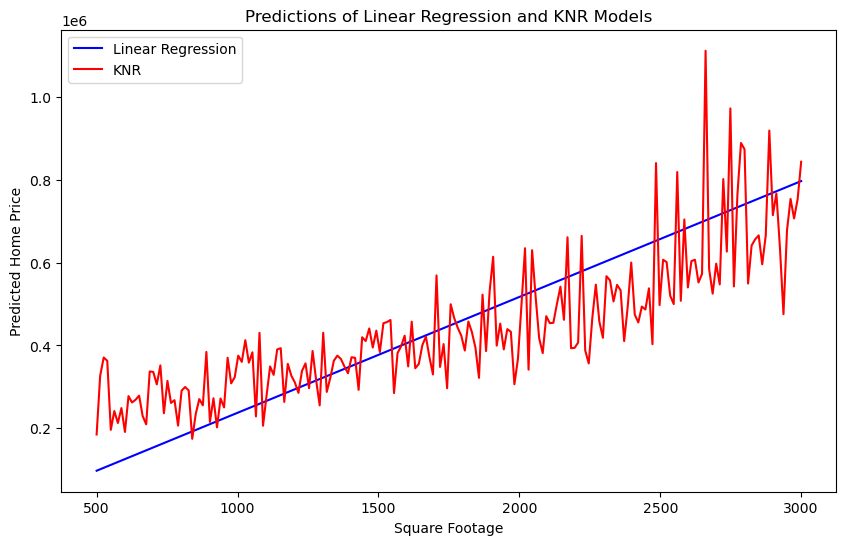

In [96]:
plt.figure(figsize=(10,6))
plt.plot(sq_ft_x, reg_sqft_pred, label = 'Linear Regression', color = 'blue')
plt.plot(sq_ft_x, KNR_sqft_pred, label = 'KNR', color = 'red')
plt.xlabel('Square Footage')
plt.ylabel('Predicted Home Price')
plt.title('Predictions of Linear Regression and KNR Models')
plt.legend()
plt.show()

11. Finally, let's see what happens when we add another variable. Create a new linear regression model which uses both the square footage of living space and whether or not it is waterfront. When you do this, make sure that you're using the same train and test split by using the same random_state as above. By how much does this improve the model's fit?

In [98]:
house_sales_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [106]:
X = house_sales_df[["sqft_living", "waterfront"]]
y = house_sales_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_coef = reg.coef_ 
print("Regression's Coefficient: {}".format(reg_coef))
reg_intercept = reg.intercept_
print("Regression's Intercept : {}".format(reg_intercept))
y_pred = reg.predict(X_test)

Regression's Coefficient: [2.73016591e+02 7.89049104e+05]
Regression's Intercept : -34063.14076427091


In [114]:
MeanSquaredError = mean_squared_error(y_test, y_pred)
RootMeanSquaredError = np.sqrt(MeanSquaredError)
MeanAbsoluteError = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
MeanAbsolutePercentageError = mean_absolute_percentage_error(y_test, y_pred) * 100

In [118]:
print("MeanSquaredError: Using Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage of homes and waterfront true or false - note: is a squared value. \n".format(MeanSquaredError))
print("RootMeanSquaredError: Using Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage and waterfront true or false.\n".format(RootMeanSquaredError)) 
print("MeanAbsoluteError: Using Linear Regression, on average, each predicted home price is off by ${} than the actual home price, based on square footage and waterfront true or false.\n".format(MeanAbsoluteError)) 
print("R_squared:Roughly {} of the variance in a house price can be explained by the square footage of the house.\n".format(r_squared))
print("MeanAbsolutePercentageError: Using Linear Regression, on average, our predicted home prices are {}% off our actual home prices, based on square footage and waterfront true or false.\n".format(MeanAbsolutePercentageError))

MeanSquaredError: Using Linear Regression, on average, each predicted home price is off by $67664973042.120766 than the actual home price, based on square footage of homes and waterfront true or false - note: is a squared value. 

RootMeanSquaredError: Using Linear Regression, on average, each predicted home price is off by $260124.9181491861 than the actual home price, based on square footage and waterfront true or false.

MeanAbsoluteError: Using Linear Regression, on average, each predicted home price is off by $173728.53303476996 than the actual home price, based on square footage and waterfront true or false.

R_squared:Roughly 0.5312973700064663 of the variance in a house price can be explained by the square footage of the house.

MeanAbsolutePercentageError: Using Linear Regression, on average, our predicted home prices are 35.53730733351247% off our actual home prices, based on square footage and waterfront true or false.

